<a href="https://colab.research.google.com/github/pranscript/ml_coursework/blob/master/Homework_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score  

In [231]:
from google.colab import files
train = files.upload()

Saving train.csv to train (1).csv


In [232]:
import io
train_df = pd.read_csv(io.BytesIO(train['train.csv']),header = None)
train_df_temp = train_df.copy()
print (train_df_temp) 

                     0     1    2       3     4
0                Texas  Home  Out   1-NBC   Win
1             Virginia  Away  Out   4-ABC   Win
2          GeorgiaTech  Home   In   1-NBC   Win
3                UMass  Home  Out   1-NBC   Win
4              Clemson  Away   In   4-ABC  Lose
5                 Navy  Home  Out   1-NBC   Win
6                  USC  Home   In   1-NBC   Win
7               Temple  Away  Out   4-ABC   Win
8                 PITT  Away  Out   4-ABC   Win
9           WakeForest  Home  Out   1-NBC   Win
10       BostonCollege  Away  Out   1-NBC   Win
11            Stanford  Away   In   3-FOX  Lose
12               Texas  Away  Out   4-ABC  Lose
13              Nevada  Home  Out   1-NBC   Win
14       MichiganState  Home  Out   1-NBC  Lose
15                Duke  Home  Out   1-NBC  Lose
16            Syracuse  Home  Out  2-ESPN   Win
17  NorthCarolinaState  Away  Out   4-ABC  Lose
18            Stanford  Home   In   1-NBC  Lose
19        MiamiFlorida  Home  Out   1-NB

In [234]:
test = files.upload()

Saving test.csv to test (1).csv


In [235]:
test_df = pd.read_csv(io.BytesIO(test['test.csv']),header = None)
test_df_temp = test_df.copy()
print (test_df) 

                     0     1    2       3     4
0               Temple  Home  Out   1-NBC   Win
1              Georgia  Home   In   1-NBC  Lose
2        BostonCollege  Away  Out  2-ESPN   Win
3        MichiganState  Away  Out   3-FOX   Win
4            MiamiOhio  Home  Out   1-NBC   Win
5        NorthCarolina  Away  Out   4-ABC   Win
6                  USC  Home   In   1-NBC   Win
7   NorthCarolinaState  Home  Out   1-NBC   Win
8           WakeForest  Home  Out   1-NBC   Win
9         MiamiFlorida  Away   In   4-ABC  Lose
10                Navy  Home  Out   1-NBC   Win
11            Stanford  Away   In   4-ABC  Lose


In [236]:
X_train = train_df.values[:, 1:4] 
X_train

array([['Home', 'Out', '1-NBC'],
       ['Away', 'Out', '4-ABC'],
       ['Home', 'In', '1-NBC'],
       ['Home', 'Out', '1-NBC'],
       ['Away', 'In', '4-ABC'],
       ['Home', 'Out', '1-NBC'],
       ['Home', 'In', '1-NBC'],
       ['Away', 'Out', '4-ABC'],
       ['Away', 'Out', '4-ABC'],
       ['Home', 'Out', '1-NBC'],
       ['Away', 'Out', '1-NBC'],
       ['Away', 'In', '3-FOX'],
       ['Away', 'Out', '4-ABC'],
       ['Home', 'Out', '1-NBC'],
       ['Home', 'Out', '1-NBC'],
       ['Home', 'Out', '1-NBC'],
       ['Home', 'Out', '2-ESPN'],
       ['Away', 'Out', '4-ABC'],
       ['Home', 'In', '1-NBC'],
       ['Home', 'Out', '1-NBC'],
       ['Home', 'Out', '5-CBS'],
       ['Home', 'Out', '1-NBC'],
       ['Home', 'In', '1-NBC'],
       ['Away', 'In', '4-ABC']], dtype=object)

In [237]:
Y_train = train_df.values[:, 4:5] 
Y_train

array([['Win'],
       ['Win'],
       ['Win'],
       ['Win'],
       ['Lose'],
       ['Win'],
       ['Win'],
       ['Win'],
       ['Win'],
       ['Win'],
       ['Win'],
       ['Lose'],
       ['Lose'],
       ['Win'],
       ['Lose'],
       ['Lose'],
       ['Win'],
       ['Lose'],
       ['Lose'],
       ['Win'],
       ['Lose'],
       ['Win'],
       ['Lose'],
       ['Lose']], dtype=object)

In [238]:
X_test = test_df.values[:, 1:4] 
Y_test = test_df.values[:, 4:5] 
Y_test

array([['Win'],
       ['Lose'],
       ['Win'],
       ['Win'],
       ['Win'],
       ['Win'],
       ['Win'],
       ['Win'],
       ['Win'],
       ['Lose'],
       ['Win'],
       ['Lose']], dtype=object)

In [239]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for i in range(3):
    X_train[:,i] = le.fit_transform(X_train[:,i])
X_train

array([[1, 1, 0],
       [0, 1, 3],
       [1, 0, 0],
       [1, 1, 0],
       [0, 0, 3],
       [1, 1, 0],
       [1, 0, 0],
       [0, 1, 3],
       [0, 1, 3],
       [1, 1, 0],
       [0, 1, 0],
       [0, 0, 2],
       [0, 1, 3],
       [1, 1, 0],
       [1, 1, 0],
       [1, 1, 0],
       [1, 1, 1],
       [0, 1, 3],
       [1, 0, 0],
       [1, 1, 0],
       [1, 1, 4],
       [1, 1, 0],
       [1, 0, 0],
       [0, 0, 3]], dtype=object)

In [240]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for i in range(3):
    X_test[:,i] = le.fit_transform(X_test[:,i])
X_test

array([[1, 1, 0],
       [1, 0, 0],
       [0, 1, 1],
       [0, 1, 2],
       [1, 1, 0],
       [0, 1, 3],
       [1, 0, 0],
       [1, 1, 0],
       [1, 1, 0],
       [0, 0, 3],
       [1, 1, 0],
       [0, 0, 3]], dtype=object)

In [241]:
#clf_gini_train = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=3, min_samples_leaf=5) 
clf_gini_train = DecisionTreeClassifier(criterion = "gini") 
clf_gini = clf_gini_train.fit(X_train, Y_train) 
clf_gini

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [242]:
clf_entropy_train = DecisionTreeClassifier(criterion = "entropy") 
clf_entropy = clf_entropy_train.fit(X_train, Y_train)
clf_entropy

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [243]:
Y_pred_gini = clf_gini.predict(X_test) 
Y_pred_gini

array(['Win', 'Lose', 'Win', 'Win', 'Win', 'Win', 'Lose', 'Win', 'Win',
       'Lose', 'Win', 'Lose'], dtype=object)

In [244]:
Y_pred_entropy = clf_entropy.predict(X_test) 
Y_pred_entropy

array(['Win', 'Lose', 'Win', 'Win', 'Win', 'Win', 'Lose', 'Win', 'Win',
       'Lose', 'Win', 'Lose'], dtype=object)

In [245]:
#train_df.values[:, 0:1].flatten()
id3 = pd.DataFrame({'Opponent':test_df_temp[0],
              'Is_Home_or_Away':test_df_temp[1] ,
              'Is_Opponent_in_AP25_Preseason':test_df_temp[2] ,
              'Media':test_df_temp[3] ,
              'Test':Y_test.flatten(),
              'Predicted': Y_pred_gini})
id3

,Opponent,Is_Home_or_Away,Is_Opponent_in_AP25_Preseason,Media,Test,Predicted
0,Temple,Home,Out,1-NBC,Win,Win
1,Georgia,Home,In,1-NBC,Lose,Lose
2,BostonCollege,Away,Out,2-ESPN,Win,Win
3,MichiganState,Away,Out,3-FOX,Win,Win
4,MiamiOhio,Home,Out,1-NBC,Win,Win
5,NorthCarolina,Away,Out,4-ABC,Win,Win
6,USC,Home,In,1-NBC,Win,Lose
7,NorthCarolinaState,Home,Out,1-NBC,Win,Win
8,WakeForest,Home,Out,1-NBC,Win,Win
9,MiamiFlorida,Away,In,4-ABC,Lose,Lose


In [246]:
print ("Accuracy gini: ", accuracy_score(Y_test, Y_pred_gini)*100) 
print ("Accuracy entropy: ", accuracy_score(Y_test, Y_pred_entropy)*100) 

Accuracy gini:  91.66666666666666
Accuracy entropy:  91.66666666666666


In [247]:
print("Precision: gini", precision_score(Y_test, Y_pred_gini, pos_label='Win'))
print("Precision: entropy", precision_score(Y_test, Y_pred_entropy, pos_label='Win'))

Precision: gini 1.0
Precision: entropy 1.0


In [248]:
print("Recall: gini", recall_score(Y_test, Y_pred_gini, pos_label='Win'))
print("Recall: entropy", recall_score(Y_test, Y_pred_entropy, pos_label='Win'))

Recall: gini 0.8888888888888888
Recall: entropy 0.8888888888888888


In [249]:
print("F1: gini", f1_score(Y_test, Y_pred_gini, pos_label='Win'))
print("F1: entropy", f1_score(Y_test, Y_pred_entropy, pos_label='Win'))

F1: gini 0.9411764705882353
F1: entropy 0.9411764705882353


In [0]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

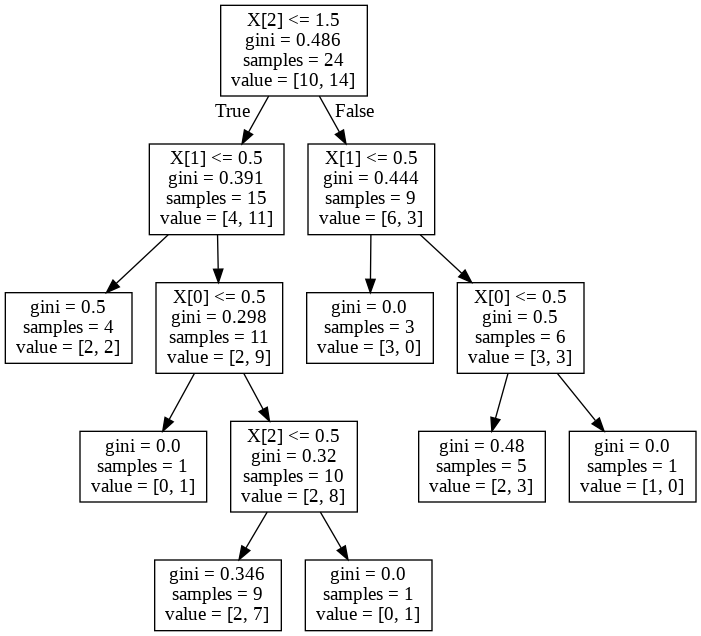

In [251]:
dot_data = StringIO()
feature_cols = ['Is_Home_or_Away', 'Is_Opponent_in_AP25_Preseason', 'Media']
#export_graphviz(clf_gini, out_file=dot_data,filled=True, rounded=True,special_characters=True,feature_names = feature_cols,class_names=['0','1'])
export_graphviz(clf_gini,out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('dia.png')
Image(graph.create_png())